## School System Finances

In [287]:
# removes the need to call plt.show() every time
%matplotlib inline 
import missingno as msno
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import statsmodels.api as sm
from scipy.io import loadmat as loadmat

In [2]:
df = pd.read_csv('school_data.csv')

/Users/SophiaLi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1.500100e+12,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1.500200e+12,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1.500300e+12,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1.500300e+12,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1.500400e+12,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


In [4]:
df.columns

Index(['STATE', 'IDCENSUS', 'NAME', 'CONUM', 'CSA', 'CBSA', 'SCHLEV', 'NCESID',
       'YRDATA', 'V33',
       ...
       'V32', '_19H', '_21F', '_31F', '_41F', '_61V', '_66V', 'W01', 'W31',
       'W61'],
      dtype='object', length=141)

In [249]:
clean_df = df[['NAME', 'IDCENSUS', 'CSA', 'SCHLEV', 'TOTALREV', 'TFEDREV', 'TSTREV', 'TLOCREV', 
               'TCURINST', 'TCURSSVC', 'T06', 'TCURELSC']]

In [225]:
#clean_df.columns = ['ID_Census', "Name", 'ANSI_Code', 'Consolidated Statistical Area1']

In [226]:
clean_df.head()

,NAME,IDCENSUS,CSA,SCHLEV,TOTALREV,TFEDREV,TSTREV,TLOCREV,TCURINST,TCURSSVC,T06
0,AUTAUGA COUNTY SCHOOL DISTRICT,1.500100e+12,N,3,79665,7574,53244,18847,44085,23217,6614
1,BALDWIN COUNTY SCHOOL DISTRICT,1.500200e+12,380,3,330317,23602,143282,163433,155668,99682,45464
2,BARBOUR COUNTY SCHOOL DISTRICT,1.500300e+12,N,3,10519,2518,5632,2369,5249,3835,1301
3,EUFAULA CITY SCHOOL DISTRICT,1.500300e+12,N,3,26076,3374,16048,6654,14887,7494,2807
4,BIBB COUNTY SCHOOL DISTRICT,1.500400e+12,142,3,31825,3586,21687,6552,16019,10822,1472


In [76]:
clean_df.shape

(14376, 10)

In [ ]:
clean_df.SCHLEV.unique()

In [243]:
print("data points for school level code 1:", sum(clean_df['SCHLEV'] == 1))
print("data points for school level code 2:", sum(clean_df['SCHLEV'] == 2))
print("data points for school level code 3:", sum(clean_df['SCHLEV'] == 3))
print("data points for school level code 5:", sum(clean_df['SCHLEV'] == 5))
print("data points for school level code 6:", sum(clean_df['SCHLEV'] == 6))
print("data points for school level code 7:", sum(clean_df['SCHLEV'] == 7))


data points for school level code 1: 2435
data points for school level code 2: 423
data points for school level code 3: 10478
data points for school level code 5: 234
data points for school level code 6: 79
data points for school level code 7: 727


In [244]:
clean_df.SCHLEV.unique()

array([3, 1, 5, 2, 6, 7])

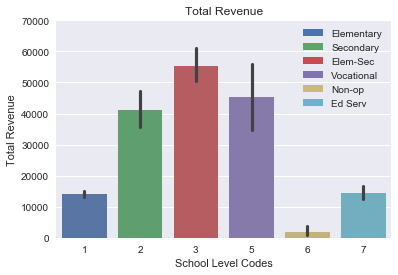

In [223]:
TR = sns.barplot(clean_df.SCHLEV, clean_df.TOTALREV).set_title('Total Revenue')
b1 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b2 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b3 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b5 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b6 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b7 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
l1 = legend([b1, b2, b3, b5, b6, b7], ["Elementary", "Secondary", "Elem-Sec", "Vocational", "Non-op", "Ed Serv"])
plt.ylim(0, 70000)
plt.xlabel('School Level Codes')
plt.ylabel('Total Revenue')

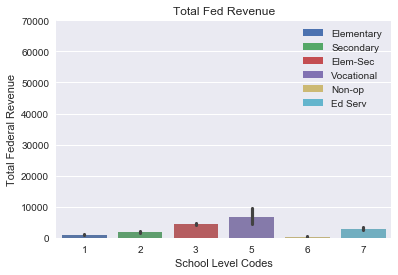

In [222]:
FED = sns.barplot(clean_df.SCHLEV, clean_df.TFEDREV).set_title('Total Fed Revenue')
b1 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b2 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b3 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b5 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b6 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b7 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
l1 = legend([b1, b2, b3, b5, b6, b7], ["Elementary", "Secondary", "Elem-Sec", "Vocational", "Non-op", "Ed Serv"])
plt.ylim(0, 70000)
plt.xlabel('School Level Codes')
plt.ylabel('Total Federal Revenue')

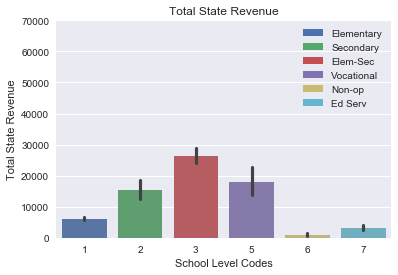

In [220]:
STATE = sns.barplot(clean_df.SCHLEV, clean_df.TSTREV).set_title('Total State Revenue')
b1 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b2 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b3 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b5 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b6 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b7 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
l1 = legend([b1, b2, b3, b5, b6, b7], ["Elementary", "Secondary", "Elem-Sec", "Vocational", "Non-op", "Ed Serv"])
plt.ylim(0, 70000)
plt.xlabel('School Level Codes')
plt.ylabel('Total State Revenue')

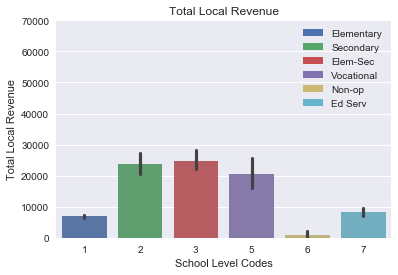

In [221]:
LOCAL = sns.barplot(clean_df.SCHLEV, clean_df.TLOCREV).set_title('Total Local Revenue')
b1 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b2 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b3 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b5 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b6 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
b7 = bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, align="center")
l1 = legend([b1, b2, b3, b5, b6, b7], ["Elementary", "Secondary", "Elem-Sec", "Vocational", "Non-op", "Ed Serv"])
plt.ylim(0, 70000)
plt.xlabel('School Level Codes')
plt.ylabel('Total Local Revenue')

In [250]:
clean_df2 = clean_df[clean_df['TOTALREV'] < 1500000]

In [251]:
tax = clean_df2.T06
tot_rev = clean_df2.TOTALREV

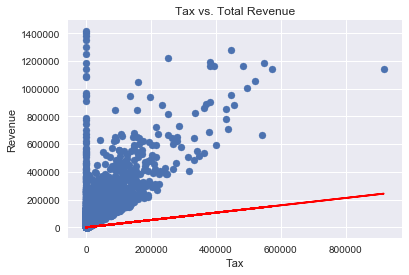

In [252]:
myOLS_points = sm.OLS(tax, tot_rev).fit() 
plt.plot(tax, myOLS_points.predict(tax), color = 'red')
plt.scatter(tax, tot_rev)
plt.title("Tax vs. Total Revenue")
plt.xlabel("Tax")
plt.ylabel("Revenue")
plt.show()


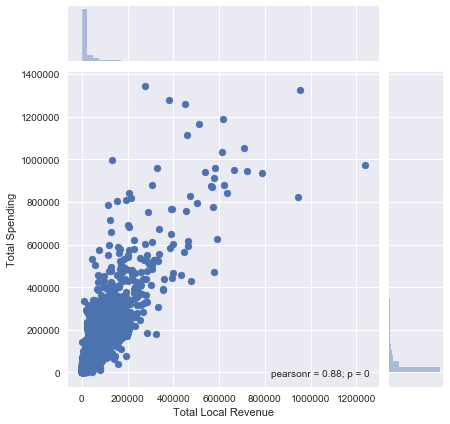

In [300]:
sns.jointplot(clean_df2.TLOCREV, clean_df2.TCURELSC).set_axis_labels("Total Local Revenue", "Total Spending")
#plt.set_title('Local Revenue vs Total Spending')


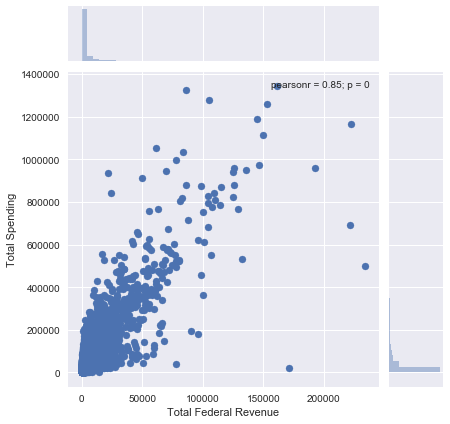

In [302]:
sns.jointplot(clean_df2.TFEDREV, clean_df2.TCURELSC).set_axis_labels("Total Federal Revenue", "Total Spending")

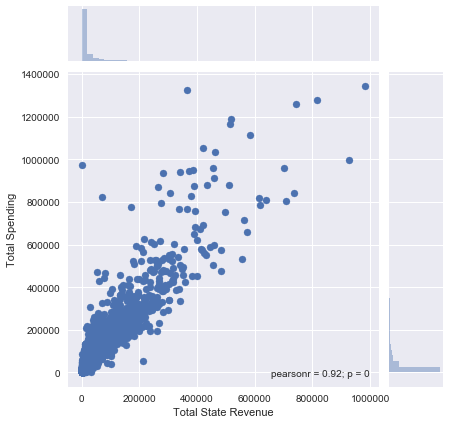

In [301]:
sns.jointplot(clean_df2.TSTREV, clean_df2.TCURELSC).set_axis_labels("Total State Revenue", "Total Spending")

In [257]:
clean_df2['Result'] = clean_df2['T06']/clean_df2['TLOCREV']

/Users/SophiaLi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [258]:
clean_df2['Result'].describe()

count    14303.000000
mean         0.645070
std          0.313434
min          0.000000
25%          0.564880
50%          0.749863
75%          0.873577
max          1.000000
Name: Result, dtype: float64

In [259]:
clean_df2['Result'] = clean_df2['T06']/clean_df2['TOTALREV']

/Users/SophiaLi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [260]:
clean_df2['Result'].describe()

count    14344.000000
mean         0.292837
std          0.227640
min          0.000000
25%          0.123649
50%          0.256553
75%          0.428832
max          0.994872
Name: Result, dtype: float64

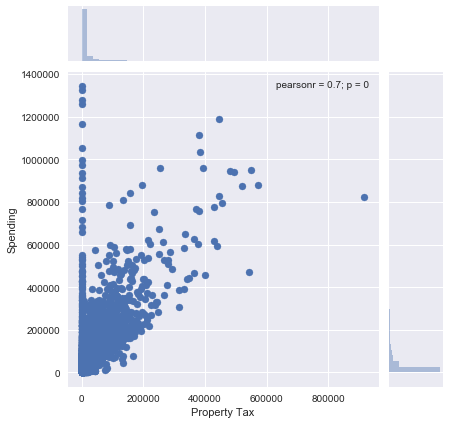

In [314]:
sns.jointplot(clean_df2.T06, clean_df2.TCURELSC).set_axis_labels("Property Tax", "Spending")

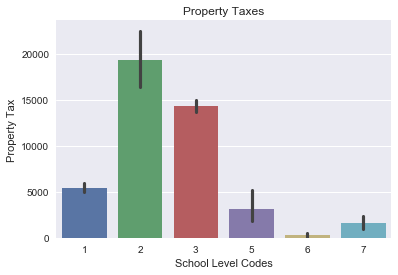

In [306]:
TR = sns.barplot(clean_df2.SCHLEV, clean_df2.T06).set_title('Property Taxes')
plt.xlabel("School Level Codes")
plt.ylabel("Property Tax")

In [264]:
second=clean_df2[clean_df2['SCHLEV'] ==2]

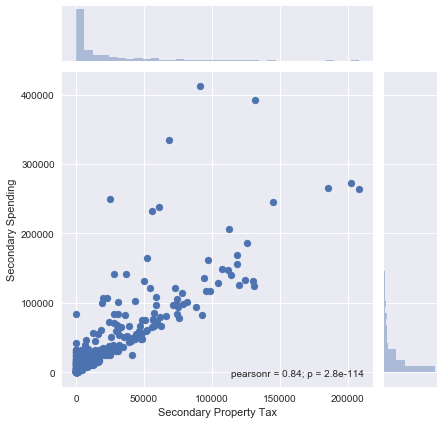

In [312]:
sns.jointplot(second.T06, clean_df2.TCURELSC).set_axis_labels("Secondary Property Tax", "Secondary Spending")


Functions for Training

In [266]:
def sigmoid(X, w):
    """
    Compute the elementwise sigmoid of the product Xw
    Data in X should be rows, weights are a column. 
    """
    return 1 / (1 + np.exp(-np.dot(X, w)))

def gradient(X, y, w, onept, lamb=0):
    """
    Compute gradient of regularized loss function. 
    Accomodate for if X is just one data point. 
    """
    if onept: 
        return 2 * lamb * w - ((y - sigmoid(X, w)) * X).reshape(w.size, 1)
    return 2 * lamb * w - np.dot(X.T, y - sigmoid(X, w)) / y.size

def loss(X, y, w, lamb=0):
    """
    Compute total loss for the data in X, labels in y, params w
    """
    sumcost = 0
    for i in range(X.shape[0]):
        sumcost += y[i] * np.log(sigmoid(X[i], w)) + (1 - y[i]) * np.log(1 - sigmoid(X[i], w))
    return lamb * np.linalg.norm(w)**2 - sumcost / y.size

def accuracy(X, y, w):
    """
    Compute accuracy for data in X, labels in y, params w
    """
    results = np.round(sigmoid(X, w))
    score = sum([results[i] == y[i] for i in range(y.size)]) / y.size
    return score[0]


In [289]:

#schdata = loadmat('school_data.csv')
#schdata.keys()

In [290]:
tax_train = clean_df2['T06']
totspend_Labels = clean_df2['TCURELSC']

tax_train = np.concatenate([tax_train, np.ones((tax_train.shape[0], 1))], axis=1)
tax_train.shape

IndexError: axis 1 out of bounds [0, 1)

In [281]:

weights = np.asarray([np.random.rand() for i in range(tax_train.shape[1])]).reshape(tax_train.shape[1], 1)
weights /= np.linalg.norm(weights)
losses = []
accuracies = []
epsilon = 0.001
num_iterations = 100

for i in range(100):
    diff = epsilon * gradient(tax_train, totspend_Labels, weights, False)
    weights = weights - diff
    losses.append(loss(tax_train, totspend_Labels, weights))
    accuracies.append(accuracy(tax_train, totspend_Labels, weights))

IndexError: tuple index out of range